### Data Preprocessing and Exploratory Data Analysis.

- In the last step, we have collected the reviews from the site and saved the file in the system as "Lion_King_Review.csv"


- In this step, we will analyse the dataset, pre-process it and check for the meaningful sights from it as a part of Exploratory Data Analysis. 

In [2]:
#Import all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline 
from contractions import CONTRACTION_MAP
import unicodedata
import re
import string
import nltk
from nltk import FreqDist
from nltk.util import ngrams
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read the data in the CSV file using pandas
lionking_dataset= pd.read_csv('Lion_King_Review.csv')

#print the top rows.
lionking_dataset.head()

,Unnamed: 0,createDate,displayImageUrl,displayName,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,timeFromCreation,updateDate,userAccountLink,userDisplayName,userId,userRealm
0,0,2019-08-18T08:54:30.664Z,NaN,Joanne H,False,False,False,True,STAR_5,I liked most that the animation made the anima...,5.0,31m ago,2019-08-18T08:54:30.890Z,NaN,Joanne H,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Fandango
1,1,2019-08-18T08:03:49.380Z,https://graph.facebook.com/v3.3/594379764/picture,Frankie C,False,False,False,False,STAR_5,Amazing! So realistic and incredible music,5.0,1h ago,2019-08-18T08:03:49.380Z,/user/id/871398953,Frankie C,871398953,RT
2,2,2019-08-18T07:13:32.422Z,NaN,jaycee,False,False,False,False,STAR_5,Classic. Good remake. Loved it. Glover was out...,5.0,2h ago,2019-08-18T07:13:32.422Z,NaN,jaycee,DD2453B0-37CE-4B47-A099-D15378FC310E,Fandango
3,3,2019-08-18T07:06:08.698Z,https://graph.facebook.com/v3.3/10000047937306...,Peter A,False,False,False,False,STAR_2,Nice animation/CGI but completely lacking the ...,2.0,2h ago,2019-08-18T07:06:46.610Z,/user/id/906750266,Peter A,906750266,RT
4,4,2019-08-18T06:38:46.892Z,NaN,Kevin M,False,False,False,True,STAR_4,Good but go mainly for the sentimental value,4.0,3h ago,2019-08-18T06:38:46.892Z,NaN,Kevin M,21FE7D93-351C-43B5-833D-B1DB11F3FD6A,Fandango


In [4]:
#Check the shape of the dataset
lionking_dataset.shape

(3000, 17)

In [5]:
#Check the datatypes of each attribute.

lionking_dataset.dtypes

Unnamed: 0            int64
createDate           object
displayImageUrl      object
displayName          object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
userAccountLink      object
userDisplayName      object
userId               object
userRealm            object
dtype: object

In [6]:
#Collect all the column names
columns=lionking_dataset.columns
print(columns)

Index(['Unnamed: 0', 'createDate', 'displayImageUrl', 'displayName',
       'hasProfanity', 'hasSpoilers', 'isSuperReviewer', 'isVerified',
       'rating', 'review', 'score', 'timeFromCreation', 'updateDate',
       'userAccountLink', 'userDisplayName', 'userId', 'userRealm'],
      dtype='object')


In [7]:
#Checking for missing values
lionking_dataset.isnull().sum()

Unnamed: 0             0
createDate             0
displayImageUrl     2778
displayName          139
hasProfanity           0
hasSpoilers            0
isSuperReviewer        0
isVerified             0
rating                 0
review                 0
score                  0
timeFromCreation       0
updateDate             0
userAccountLink     2390
userDisplayName      139
userId                 0
userRealm              0
dtype: int64

We can see that the attributes "displayImageUrl" and "userAccountLink" has many null values, 2778 and 2390 respectively. So, we will ignore these attributes for analysis.

In [8]:
#Compare the two columns "Rating" and "Score" as we can see that both the columns has equal count.

print("The rating of the movie is : \n",lionking_dataset['rating'].value_counts())
print("---------------------------")
print("The score of the movie is : \n",lionking_dataset['score'].value_counts())

The rating of the movie is : 
 STAR_5      1371
STAR_4       428
STAR_3       285
STAR_3_5     199
STAR_4_5     174
STAR_2       171
STAR_2_5     120
STAR_0_5     113
STAR_1        91
STAR_1_5      48
Name: rating, dtype: int64
---------------------------
The score of the movie is : 
 5.0    1371
4.0     428
3.0     285
3.5     199
4.5     174
2.0     171
2.5     120
0.5     113
1.0      91
1.5      48
Name: score, dtype: int64


We can see that both the attributes are same. Hence, we will delete one of them.

Also there are few attributes in the dataset which are not useful, so delete all those attributes(columns) or

Select only those attributes which you need.


In [9]:
# Let's select the required attributes for further analysis

required_attributes=['userId','displayName','createDate','updateDate','isVerified','review', 'score','userRealm']

In [10]:
#Select the dataframe only with above mentioned attributes

lionking_dataset=lionking_dataset[required_attributes]

In [11]:
#Check the dataset now
lionking_dataset.head(3)

,userId,displayName,createDate,updateDate,isVerified,review,score,userRealm
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18T08:54:30.664Z,2019-08-18T08:54:30.890Z,True,I liked most that the animation made the anima...,5.0,Fandango
1,871398953,Frankie C,2019-08-18T08:03:49.380Z,2019-08-18T08:03:49.380Z,False,Amazing! So realistic and incredible music,5.0,RT
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18T07:13:32.422Z,2019-08-18T07:13:32.422Z,False,Classic. Good remake. Loved it. Glover was out...,5.0,Fandango


Now the dataframe has the required attributes. But, the naming of these attributes are messy. 

- So, lets rename the columns in neat format.
- Create a new attribute called "sentiment" as the target variable.

In [12]:
#Renaming the dataframe columns

lionking_dataset.rename(columns={"createDate": "Date-of-Review", 
                                 "displayName": "Reviewer Name",
                                 "isVerified": "Verified Reviewer",
                                 "review": "Review",
                                 "score": "Rating",
                                 "userId": "ReviewID",
                                 "userRealm":"Platform",
                                 "updateDate" :"Updated-Date-of-Review",
                                }, inplace=True)

In [13]:
#Check the dataset now, the columns names has been updated.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Updated-Date-of-Review,Verified Reviewer,Review,Rating,Platform
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18T08:54:30.664Z,2019-08-18T08:54:30.890Z,True,I liked most that the animation made the anima...,5.0,Fandango
1,871398953,Frankie C,2019-08-18T08:03:49.380Z,2019-08-18T08:03:49.380Z,False,Amazing! So realistic and incredible music,5.0,RT
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18T07:13:32.422Z,2019-08-18T07:13:32.422Z,False,Classic. Good remake. Loved it. Glover was out...,5.0,Fandango


In [14]:
#Create a new variable "sentiment" as target variable.

#The condition is : Rating >3 then postive | Rating <3 then negative.

lionking_dataset["sentiment"] = lionking_dataset["Rating"].apply(lambda score: "positive" if score > 3.0 else "negative")


In [15]:
#Check the dataset, the sentiment column has been created with the required sentiments.

lionking_dataset.sample(5)

,ReviewID,Reviewer Name,Date-of-Review,Updated-Date-of-Review,Verified Reviewer,Review,Rating,Platform,sentiment
1639,1c9b883b-050b-4b88-8117-62cc20b15dc5,KMF,2019-08-06T03:43:21.034Z,2019-08-06T03:43:21.034Z,True,Enjoyed the movie very much!,5.0,Fandango,positive
2266,657EF9EB-C4F8-490D-B458-86FA0086DF32,Manuel,2019-08-04T03:13:50.870Z,2019-08-17T18:09:46.008Z,True,Did miss some parts of the original but still ...,4.0,Fandango,positive
1125,FA8FD36E-38A0-4685-8BB5-B8A00636F793,kdmegaxfan,2019-08-08T15:24:01.959Z,2019-08-08T15:24:01.959Z,True,The movie was AMAZING! Disney changed a few th...,4.0,Fandango,positive
972,B15848EE-5510-45CC-8BD3-98CB02AD3861,Gregory,2019-08-09T13:05:39.222Z,2019-08-09T13:05:39.222Z,True,it was okay but not what I was expecting,3.0,Fandango,negative
968,F7068E81-AA71-4CE4-AAB5-B479160D339F,John M,2019-08-09T14:09:09.875Z,2019-08-09T14:09:09.875Z,True,Enjoyable all the way through.,5.0,Fandango,positive


The attribute "sentiment" is our target variable.


In [16]:
#Check the null values

lionking_dataset.isnull().sum()

ReviewID                    0
Reviewer Name             139
Date-of-Review              0
Updated-Date-of-Review      0
Verified Reviewer           0
Review                      0
Rating                      0
Platform                    0
sentiment                   0
dtype: int64

In [17]:
#Lets check the datatype information along with the null values

lionking_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
ReviewID                  3000 non-null object
Reviewer Name             2861 non-null object
Date-of-Review            3000 non-null object
Updated-Date-of-Review    3000 non-null object
Verified Reviewer         3000 non-null bool
Review                    3000 non-null object
Rating                    3000 non-null float64
Platform                  3000 non-null object
sentiment                 3000 non-null object
dtypes: bool(1), float64(1), object(7)
memory usage: 190.5+ KB


In [18]:
#Analyse the target variable

#Value count of sentiment attribute.
sentiments=lionking_dataset.groupby('sentiment')['sentiment'].count()

print(sentiments)
print('\n')
print(sentiments.index)

sentiment
negative     828
positive    2172
Name: sentiment, dtype: int64


Index(['negative', 'positive'], dtype='object', name='sentiment')


In [19]:
#Percentage of postive and negative sentiment reviews in the dataset.

print("The Percentage of Positive Sentiment Reviews is: ",sentiments.positive/(len(lionking_dataset['sentiment']))*100)

print("The Percentage of Negative Sentiment Reviews is: ",sentiments.negative/(len(lionking_dataset['sentiment']))*100)

The Percentage of Positive Sentiment Reviews is:  72.39999999999999
The Percentage of Negative Sentiment Reviews is:  27.6


We have 72.39% of Positive Sentiment Reviews in our Dataset and 27.60% of Negative Sentiment Reviews.

Text(0.5,1,' Sentiment Analysis')

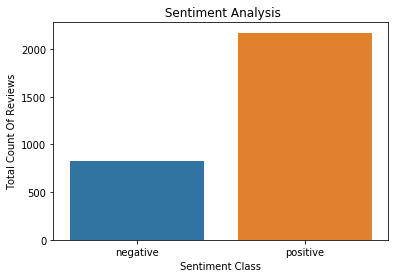

In [20]:
#Plot the count of the target variable.

sns.barplot(x=sentiments.index,y=sentiments)
plt.xlabel("Sentiment Class")
plt.ylabel("Total Count Of Reviews")
plt.title(" Sentiment Analysis")

In the target variable "sentiment" we have two classes "postive" and "negative" and the total respective count of these classes are 2712 (positive) and 828 (negative)

In [21]:
#Value count of rating attribute.
ratings=lionking_dataset.groupby('Rating')['Rating'].count()

print(ratings)
print('\n')
print(ratings.index)

Rating
0.5     113
1.0      91
1.5      48
2.0     171
2.5     120
3.0     285
3.5     199
4.0     428
4.5     174
5.0    1371
Name: Rating, dtype: int64


Float64Index([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='Rating')


Text(0.5,1,'Rating Analysis')

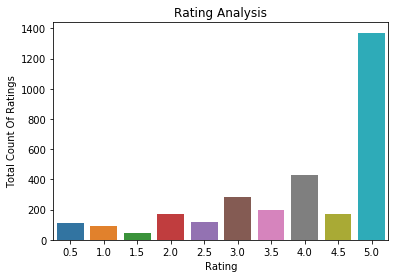

In [22]:
#Plot the count of the attribute - "Rating"

sns.barplot(x=ratings.index,y=ratings)
plt.xlabel("Rating")
plt.ylabel("Total Count Of Ratings")
plt.title("Rating Analysis")

In [23]:
#Analysis the rows which is having the null values in another dataframe.

reviewname_col=lionking_dataset[lionking_dataset['Reviewer Name'].isnull()]


In [24]:
reviewname_col

,ReviewID,Reviewer Name,Date-of-Review,Updated-Date-of-Review,Verified Reviewer,Review,Rating,Platform,sentiment
23,260314256,NaN,2019-08-18T01:43:16.296Z,2019-08-18T01:43:16.296Z,False,"Not the original, but just as special.",4.5,RT,positive
49,260245382,NaN,2019-08-17T20:38:48.823Z,2019-08-17T20:38:48.823Z,False,This movie is the most uninspired cash grab I ...,0.5,RT,negative
101,800035014,NaN,2019-08-17T05:07:56.023Z,2019-08-17T05:07:56.023Z,False,Speaking as someone who considers The Lion Kin...,4.5,RT,positive
114,972946979,NaN,2019-08-17T00:51:52.644Z,2019-08-17T00:51:52.644Z,False,This movie was a huge disappointment. The visu...,1.5,RT,negative
129,941394100,NaN,2019-08-16T22:32:40.924Z,2019-08-16T22:33:05.264Z,False,I feel like it was missing heart. It was mostl...,2.5,RT,negative
132,974234386,NaN,2019-08-16T21:50:02.989Z,2019-08-16T21:50:02.989Z,False,Awesome cute; feel good movie. Fantastic anima...,4.5,RT,positive
188,971800808,NaN,2019-08-16T00:09:27.185Z,2019-08-16T00:09:27.185Z,False,I'm done with Disney live adaptation they all ...,2.0,RT,negative
205,260124646,NaN,2019-08-15T20:24:55.923Z,2019-08-15T20:24:55.923Z,False,Was breathtaking performance from everyone And...,4.0,RT,positive
210,260070683,NaN,2019-08-15T19:22:56.743Z,2019-08-15T19:22:56.743Z,False,I loved the way it looked but they took out th...,2.5,RT,negative
217,941921585,NaN,2019-08-15T18:09:30.578Z,2019-08-15T18:09:30.578Z,False,"So, If you liked the original version then you...",3.0,RT,negative


In [25]:
#Value count of sentiment attribute where the "Reviewer Name" is null.
#We are checking this to get an idea of how the sentiment is distributed for these "NaN" reviewers

sentiments=reviewname_col.groupby('sentiment')['sentiment'].count()

print(sentiments)
print('\n')
print(sentiments.index)

sentiment
negative    68
positive    71
Name: sentiment, dtype: int64


Index(['negative', 'positive'], dtype='object', name='sentiment')


Text(0.5,1,' Sentiment Analysis')

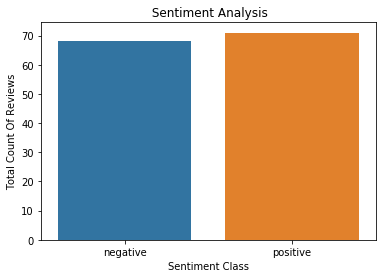

In [26]:
#Plot the count of the target variable.

sns.barplot(x=sentiments.index,y=sentiments)
plt.xlabel("Sentiment Class")
plt.ylabel("Total Count Of Reviews")
plt.title(" Sentiment Analysis")

We can see that the count of positive and negative sentiments are almost equal.

In [27]:
#Let's check the value count of rating attribute.
ratings=reviewname_col.groupby('Rating')['Rating'].count()

print(ratings)
print('\n')
print(ratings.index)

Rating
0.5     8
1.0     2
1.5     9
2.0    13
2.5    13
3.0    23
3.5    16
4.0    11
4.5    11
5.0    33
Name: Rating, dtype: int64


Float64Index([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64', name='Rating')


Text(0.5,1,'Rating Analysis')

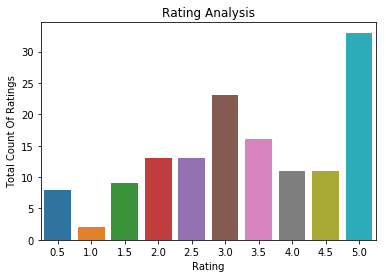

In [28]:
#Plot the count of attribute - "Rating"

sns.barplot(x=ratings.index,y=ratings)
plt.xlabel("Rating")
plt.ylabel("Total Count Of Ratings")
plt.title("Rating Analysis")

As we can see that the null valued Reviewers are fairly distributed in contributing the sentiment, we cannot delete these rows.

So,replace those null values in "Reviewer Name" with "No Name" {Instead of dropping those rows }


In [29]:
#Replace the null values in the column "Reviewer Name" with "No Name"

lionking_dataset=lionking_dataset.replace(np.nan, 'No Name', regex=True)

In [30]:
#Now check the null values

lionking_dataset.isnull().sum()

ReviewID                  0
Reviewer Name             0
Date-of-Review            0
Updated-Date-of-Review    0
Verified Reviewer         0
Review                    0
Rating                    0
Platform                  0
sentiment                 0
dtype: int64

Now we don't have any null values in our dataset.

In [31]:
#Let's check the data-types of all the attributes and change it as required.

lionking_dataset.dtypes

ReviewID                   object
Reviewer Name              object
Date-of-Review             object
Updated-Date-of-Review     object
Verified Reviewer            bool
Review                     object
Rating                    float64
Platform                   object
sentiment                  object
dtype: object

In [32]:
#Change the datatype as required.

categorical =['Verified Reviewer','Platform','sentiment'] #Required categorical attributes
string = ['Review','Reviewer Name'] #Required string attributes
date = ['Date-of-Review','Updated-Date-of-Review'] #Required date attributes

#Change the datatype to "category"
for cat in categorical:
    lionking_dataset[cat] = lionking_dataset[cat].astype('category')
    
#Change the datatype to "datetime"    
for dat in date:
    lionking_dataset[dat] = lionking_dataset[dat].astype('datetime64[ns]')

In [33]:
#Now check the datatype of all attributes.

lionking_dataset.dtypes

ReviewID                          object
Reviewer Name                     object
Date-of-Review            datetime64[ns]
Updated-Date-of-Review    datetime64[ns]
Verified Reviewer               category
Review                            object
Rating                           float64
Platform                        category
sentiment                       category
dtype: object

In [34]:
#Print the top three record in our dataset.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Updated-Date-of-Review,Verified Reviewer,Review,Rating,Platform,sentiment
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18 08:54:30.664,2019-08-18 08:54:30.890,True,I liked most that the animation made the anima...,5.0,Fandango,positive
1,871398953,Frankie C,2019-08-18 08:03:49.380,2019-08-18 08:03:49.380,False,Amazing! So realistic and incredible music,5.0,RT,positive
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18 07:13:32.422,2019-08-18 07:13:32.422,False,Classic. Good remake. Loved it. Glover was out...,5.0,Fandango,positive


To explore the relation between the date related attributes, lets find the difference in the dates of updated review and the date of review.

- This will tell us whether the review was modified later by the reviewer.
- It will help us understand how frequent does the reviewer update the reviews.

In [35]:
#Create a new attribute called Time_Difference which will hold the
#Difference in time between the date of review and updated date of review

lionking_dataset['Time_Difference']=(lionking_dataset['Updated-Date-of-Review'])-(lionking_dataset['Date-of-Review'])

In [36]:
#Check whether the time difference column has been updated and analyse its distribution.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Updated-Date-of-Review,Verified Reviewer,Review,Rating,Platform,sentiment,Time_Difference
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18 08:54:30.664,2019-08-18 08:54:30.890,True,I liked most that the animation made the anima...,5.0,Fandango,positive,00:00:00.226000
1,871398953,Frankie C,2019-08-18 08:03:49.380,2019-08-18 08:03:49.380,False,Amazing! So realistic and incredible music,5.0,RT,positive,00:00:00
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18 07:13:32.422,2019-08-18 07:13:32.422,False,Classic. Good remake. Loved it. Glover was out...,5.0,Fandango,positive,00:00:00


In [37]:
#Check for the total value counts of the difference.

lionking_dataset['Time_Difference'].value_counts()

0 days 00:00:00             2683
-1 days +23:59:59.999000       2
0 days 00:00:00.110000         2
0 days 00:00:00.006000         2
0 days 00:00:00.003000         2
0 days 00:00:00.029000         2
0 days 00:00:00.008000         2
0 days 00:00:00.004000         2
0 days 00:00:00.676000         1
0 days 00:06:18.726000         1
0 days 00:02:24.031000         1
0 days 00:00:00.011000         1
0 days 00:00:00.022000         1
0 days 00:08:03.904000         1
1 days 16:42:47.093000         1
0 days 00:00:00.728000         1
0 days 00:00:37.912000         1
0 days 00:00:48.024000         1
5 days 22:02:58.986000         1
0 days 00:00:00.453000         1
0 days 01:35:19.874000         1
0 days 00:00:00.785000         1
0 days 00:00:11.217000         1
-1 days +23:59:59.990000       1
0 days 00:00:00.010000         1
1 days 13:17:40.235000         1
0 days 00:00:02.873000         1
0 days 00:00:00.325000         1
0 days 00:00:22.777000         1
0 days 00:08:53.058000         1
          

This shows us that the most of the reviews were instanteously updated without any changes in it.

-  2683 reviews were not modified.
-  In the rest of the reviews, most of them were updated within a day ( time difference is 0 days 00 Hours:00 Minutes )

In [38]:
# Drop the columns which are not required for further analysis.

lionking_dataset.drop(["Updated-Date-of-Review","Time_Difference","Rating"], axis = 1, inplace = True) 

In [39]:
lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Verified Reviewer,Review,Platform,sentiment
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18 08:54:30.664,True,I liked most that the animation made the anima...,Fandango,positive
1,871398953,Frankie C,2019-08-18 08:03:49.380,False,Amazing! So realistic and incredible music,RT,positive
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18 07:13:32.422,False,Classic. Good remake. Loved it. Glover was out...,Fandango,positive


In [40]:
#Let's check the attribute "Review ID" and analyse it.


lionking_dataset['ReviewID'].value_counts()

f764b065-d886-41d5-88f8-e5daed677873    1
4073B0E5-D033-4586-8575-D20106008013    1
7c67f7a1-de93-4e0f-b20c-a8e3ac944efc    1
B327FF88-FC6A-4B92-BE8B-04B21744D571    1
D6E808FE-8C05-4EE3-B5A2-9B074E7402DF    1
840a16aa-0437-4d49-baef-45db61bb4a47    1
285b9c9a-c97a-4791-9f52-2fb7998a9eb8    1
82061FF9-2D05-4CFD-AC54-DD3C58B31172    1
05927F69-BEC4-4663-8732-37E4B8606FBE    1
57EF3434-5805-4D16-B4F0-34F9237EEADF    1
FC8DAE4A-E245-441D-BFC9-092329855CD1    1
46CE2B67-B41D-4A5A-A73A-076A82D73075    1
c18a75fe-1460-4275-9d24-7f9167355c20    1
8e4cf64b-d055-4aa7-9dfc-2d574cc093cf    1
978186926                               1
5e796921-5cc2-4e49-b968-0f64f8b1eb98    1
ab893df6-7875-4786-8543-b5b57306fb38    1
8A06AC36-221D-426F-A117-45BEAD96C09E    1
70A7546C-F82C-4A70-BEF5-6273A942B538    1
75bff709-2c7a-4eab-b851-f5236774cbcd    1
7eca24c0-1b3a-446a-b808-c61bb5ca73ee    1
B026E2B4-EE07-4807-B7AE-6CDD9F940438    1
137a51db-5f85-4292-ab63-d2695f22c8a5    1
35d36224-9086-4ea0-9fd4-bb22f1e0ff



- From above analysis we can see that all the "ReviewID" are unique.


In [41]:
#Let's check the attribute "Reviewer Name" and analyse it.

lionking_dataset['Reviewer Name'].value_counts()

No Name                    139
Google                      14
Facebook U                  12
Jennifer                     8
Stephanie                    7
Mary                         7
Kim                          6
Amy                          6
Michael                      6
Linda                        6
Susan                        6
Melissa                      6
Joseph                       5
Chris                        5
Sarah                        5
Bryan                        5
Ashley                       5
Victoria                     5
Diana                        5
Jo                           5
Tom                          5
Alex                         5
Christina                    5
First L                      5
Lisa                         5
Kathy                        4
Donna                        4
Cheryl                       4
Michelle                     4
Juan                         4
                          ... 
Laia A                       1
ch      

In [42]:
#We have already analysed the sentiment for the "NaN" reviewer. Let's check for one more Reviewer "Google"

lionking_dataset[(lionking_dataset['Reviewer Name']== "Google") & ((lionking_dataset['sentiment'] =="negative") | (lionking_dataset['sentiment'] =="positive"))]

,ReviewID,Reviewer Name,Date-of-Review,Verified Reviewer,Review,Platform,sentiment
37,7af5a466-5e13-4dea-84e6-3d28403f02d2,Google,2019-08-17 23:06:14.086,False,I really liked this remake of the Disney Class...,Fandango,positive
369,c5c4cef1-571b-46dd-b3f6-1b93495a6b97,Google,2019-08-14 03:08:47.084,False,Disappointed in the singing,Fandango,positive
766,8ef841bb-d8d2-4fe2-aa1d-f07313ce1d09,Google,2019-08-11 04:53:53.762,False,I love the music and the animation,Fandango,positive
777,381acb07-624f-444b-8477-e580259b8fdf,Google,2019-08-11 03:28:10.767,False,Enjoyed it. Glad it kept with tradition of the...,Fandango,positive
1218,a7b50459-c6ca-46c0-92d4-590ab0876c41,Google,2019-08-08 04:06:05.983,False,"Movie with teaching on having good character, ...",Fandango,positive
1683,0b12238e-0039-4815-87d0-33f0901f0976,Google,2019-08-06 01:36:15.427,True,I liked to whole movie,Fandango,positive
1738,5a43f68e-9438-4174-86cb-7c15d37796a3,Google,2019-08-05 22:35:39.881,False,Nothing different from the cartoon which was a...,Fandango,negative
1759,4e888d46-86df-42dc-8460-cfd91c306f27,Google,2019-08-05 20:35:33.089,False,"Visuals were stunning, vocals were captivating...",Fandango,positive
1858,b1197647-223a-4521-9de3-50da487c0df5,Google,2019-08-05 13:28:12.626,False,Once I saw the Lion King like this I went home...,Fandango,positive
1901,d09a4cf4-0d86-487a-bde3-cf36c0f83580,Google,2019-08-05 10:32:55.138,True,No one in the theater could even take this mov...,Fandango,negative


The following are my observations:
    
- We can see that the majority of the Reviewers Name are unique in our dataset.
- Most of the users name are unique, then there is no chance that the same reviewer has reviewed multiple times.
- We have analysed the distribution of sentiment count where the "Reviewer Name" was "NaN" and upon observation we have named the null values as "No Name".
- We have also observered for one more user above "Google" and observed that the "Reviews", "Date of Review" are all different.

This means that there is no duplicate record which is showing certain bias towards the movie review.


In [43]:
#Let's Analyse the review sentiment based on the Date of Review.

#Let's change the format of the Date in neat format.


lionking_dataset['Date-of-Review'] = pd.to_datetime(lionking_dataset["Date-of-Review"]).dt.strftime("%m-%d-%Y")

In [44]:
#As the date format is changed, let's check the top 3 records of our dataset.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Verified Reviewer,Review,Platform,sentiment
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,08-18-2019,True,I liked most that the animation made the anima...,Fandango,positive
1,871398953,Frankie C,08-18-2019,False,Amazing! So realistic and incredible music,RT,positive
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,08-18-2019,False,Classic. Good remake. Loved it. Glover was out...,Fandango,positive


In [45]:
#Check the datatype again.

lionking_dataset.dtypes

ReviewID               object
Reviewer Name          object
Date-of-Review         object
Verified Reviewer    category
Review                 object
Platform             category
sentiment            category
dtype: object

Changing the date format changes the datatype of attribute to object.

So we need to change the datatype to "datetime" again for further analysis.

In [46]:
#Change the datatype of date.

lionking_dataset['Date-of-Review'] = lionking_dataset['Date-of-Review'].astype('datetime64[ns]')

In [47]:
#Check the datatype now

lionking_dataset.dtypes

ReviewID                     object
Reviewer Name                object
Date-of-Review       datetime64[ns]
Verified Reviewer          category
Review                       object
Platform                   category
sentiment                  category
dtype: object

In [48]:
#Now lets create separate columns for Day, Month and Year from Date.

lionking_dataset['Review_Day']=lionking_dataset['Date-of-Review'].dt.day
lionking_dataset['Review_Month']=lionking_dataset['Date-of-Review'].dt.month
lionking_dataset['Review_Year']=lionking_dataset['Date-of-Review'].dt.year

I have created these fields to check how the ratings changed across the week. My intention is to find the below observations.

- How was the sentiment of the movie across days.
- Were there any sudden changes in the sentiment (Rating) after few days.


In [49]:
#Read the first few rows

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Date-of-Review,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Month,Review_Year
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,2019-08-18,True,I liked most that the animation made the anima...,Fandango,positive,18,8,2019
1,871398953,Frankie C,2019-08-18,False,Amazing! So realistic and incredible music,RT,positive,18,8,2019
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,2019-08-18,False,Classic. Good remake. Loved it. Glover was out...,Fandango,positive,18,8,2019


Let's check how the sentiment of the reviews are distributed across the "Review_Day".


In [50]:
#Tabulate the data for sentiment and Review_Day.

review = pd.crosstab(lionking_dataset.sentiment, lionking_dataset.Review_Day, margins=True, margins_name='Total')

review

Review_Day,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Total
sentiment,,,,,,,,,,,,,,,,,,,
positive,126,173,173,224,231,187,137,172,96,80,89,115,90,80,64,44,65,26,2172
negative,38,79,85,70,87,58,59,57,30,34,44,43,34,27,29,23,23,8,828
Total,164,252,258,294,318,245,196,229,126,114,133,158,124,107,93,67,88,34,3000


Text(0.5,1,'Positive Reviews Frequencies Around Days : Aug 1-18')

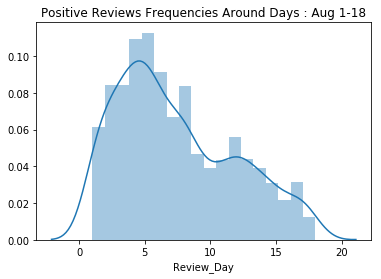

In [51]:
#Plot the distribution for positive and negative sentiments across days.

#Distribution of positive reviews count.

sns.distplot(lionking_dataset[lionking_dataset['sentiment']=="positive"]['Review_Day'],bins=18)
plt.title("Positive Reviews Frequencies Around Days : Aug 1-18")

Text(0.5,1,'Negative Reviews Frequencies Around Days : Aug 1-18')

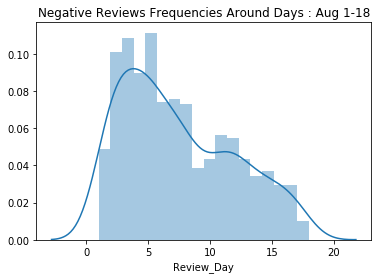

In [52]:
#Distribution of negative reviews count.

sns.distplot(lionking_dataset[lionking_dataset['sentiment']=="negative"]['Review_Day'],bins=18)
plt.title("Negative Reviews Frequencies Around Days : Aug 1-18")

In [53]:
#sns.pairplot(hue="sentiment",data=lionking_dataset)

In [54]:
#Let's check the Month value count.

lionking_dataset['Review_Month'].value_counts()

8    3000
Name: Review_Month, dtype: int64

In [55]:
#Let's check the Year value count.

lionking_dataset['Review_Year'].value_counts()

2019    3000
Name: Review_Year, dtype: int64

The Month and Year here are all same because the data we collected runtime is from 1st Aug 2019 to 18th Aug 2019.

In [56]:
#As we analysed the attributes related to dates,lets delete these attributes except the Review Day for further analysis.

lionking_dataset.drop(["Date-of-Review","Review_Month", "Review_Year"], axis = 1, inplace = True) 

In [57]:
#Check the dataset.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,positive,18
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,positive,18
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,positive,18


Few points to note here:
    
    -- Fandango is a American ticketing company that sells movie tickets.
    -- Fandango is a parent company of Rotten-Tomatoes(RT).
    -- I am interested in checking the variation in the ReviewID with respective to platform.
    -- The reviewers who are from "Fandango" platform has a different "ReviewID" than from the users who are from "RT".
    
    Hence, there is such difference in the "ReviewID" length and structure.

In [58]:
#Now check analyse the platform of the reviewer and the verified reviewers

#Platform of the reviewers

lionking_dataset['Platform'].value_counts()

Fandango    2390
RT           610
Name: Platform, dtype: int64

In [59]:
#Check how the sentiment is distributed between these platform.

platform= pd.crosstab(lionking_dataset.sentiment, lionking_dataset.Platform, margins=True, margins_name="Total")
platform

Platform,Fandango,RT,Total
sentiment,,,
positive,1909,263,2172
negative,481,347,828
Total,2390,610,3000


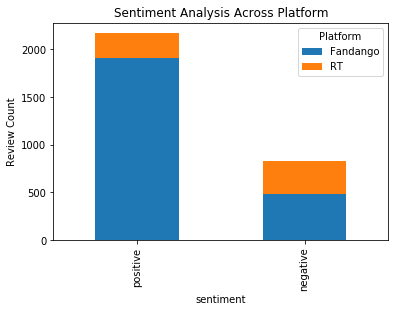

In [60]:
#Plot the count of attribute - "platform"

platform_crosstab= pd.crosstab(lionking_dataset.sentiment, lionking_dataset.Platform)
platform_crosstab.plot.bar(stacked=True)
plt.ylabel("Review Count")
plt.title("Sentiment Analysis Across Platform")
plt.legend(title='Platform')
plt.show()

In [61]:
#Let's analyse the same for the "Verified Reviewers"

lionking_dataset['Verified Reviewer'].value_counts()

True     2166
False     834
Name: Verified Reviewer, dtype: int64

In [62]:
verified_reviewer= pd.crosstab(lionking_dataset['sentiment'], lionking_dataset['Verified Reviewer'], margins=True, margins_name='Total')

verified_reviewer

Verified Reviewer,False,True,Total
sentiment,,,
positive,436,1736,2172
negative,398,430,828
Total,834,2166,3000


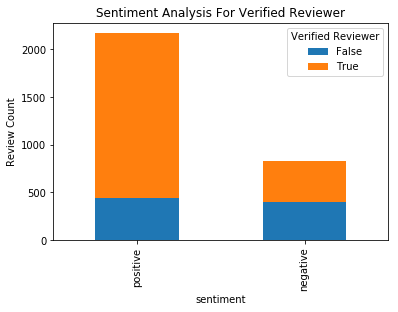

In [63]:
#Plot the count of attribute - "Verified Reviewer"

reviewer_crosstab= pd.crosstab(lionking_dataset['sentiment'], lionking_dataset['Verified Reviewer'])
reviewer_crosstab.plot.bar(stacked=True)
plt.ylabel("Review Count")
plt.title("Sentiment Analysis For Verified Reviewer")
plt.legend(title='Verified Reviewer')
plt.show()

In [64]:
#Lets check the tip few records of the dataset.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,positive,18
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,positive,18
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,positive,18


In [65]:
#Till now we have analysed the various attributes and how the sentiment is related to all those attributes.

#Before proceeding to next step, lets change the sentiment values : { postive: 1 and negative: 0}

lionking_dataset['sentiment'] = lionking_dataset['sentiment'].map({'positive': 1, 'negative': 0})

In [66]:
#Now check the dataset.
lionking_dataset.sample(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day
397,57824914-cd25-41c8-85c8-e893abab88f8,Chantelle,True,I'm a huge fan of the original Lion King. This...,Fandango,1,13
2202,977947701,Yuri M,False,I didn't see it its dull,RT,0,4
2674,1958FD0B-6913-4B1F-AC24-60CA5C7A5AC9,Mayi U.B.,True,Loved everything about the movie,Fandango,1,2


In [67]:
lionking_dataset['sentiment'].value_counts()

1    2172
0     828
Name: sentiment, dtype: int64

### Extracting Features from Text Data ( Review )

In [68]:
#We have one python file called "contractions.py" which has a function CONTRACTION_MAP.
#The function helps to expand the texts which are contraction format or written in shortcut trendy way to original text.
#This is required in the very first step so that we can have complete text reviews before proceeding with  further analysis on it.

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)

    return expanded_text

In [69]:
#Apply the defined function "expand_contractions" on the attribute "Review"
#Create a new column 'Review_Clean'  which will store the expanded text from review after the above function is applied.

lionking_dataset['Review_Clean']=[expand_contractions(re.sub('’',"'", each_review)) for each_review in lionking_dataset['Review']]

In [70]:
#Check the datatset now.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Clean
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,1,18,I liked most that the animation made the anima...
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,1,18,Amazing! So realistic and incredible music
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,1,18,Classic. Good remake. Loved it. Glover was out...


In [71]:
#Convert the text into lower case.
cleanup_re = re.compile('[^a-z]+')
def cleanup_lower(review):
    review = review.lower()
    review = cleanup_re.sub(' ', review).strip()
    return review

In [72]:
#Apply the defined function "cleanup_lower" on the attribute "Review_Clean"

lionking_dataset['Review_Clean']=[cleanup_lower(each_review) for each_review in lionking_dataset['Review_Clean']]

In [73]:
#Read the first few records

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Clean
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,1,18,i liked most that the animation made the anima...
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,1,18,amazing so realistic and incredible music
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,1,18,classic good remake loved it glover was outsta...


In [74]:
#Removing the accented characters
def remove_accented_chars(text):
    text=unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
    return text

In [75]:
#Apply the defined function "remove_accented_chars" on the attribute "Review_Clean"

lionking_dataset['Review_Clean']=[remove_accented_chars(each_review) for each_review in lionking_dataset['Review_Clean']]

In [76]:
lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Clean
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,1,18,i liked most that the animation made the anima...
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,1,18,amazing so realistic and incredible music
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,1,18,classic good remake loved it glover was outsta...


In [77]:
#Removing the scrub characters

def scrub_words(text):
    # Replace \xao characters in text -
    # \xa0 is actually non-breaking space in Latin1 (ISO 8859-1), also chr(160).
    text = re.sub('\xa0', ' ', text)

    # Replace non ascii and digits
    text = re.sub("(\\W|\\d)", ' ', text)

    # Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)

    # Remove html markup
    text = re.sub("<.*?>", ' ', text)

    return text

In [78]:
#Apply the defined function "scrub_words" on the attribute "Review_Clean"

lionking_dataset['Review_Clean']=[scrub_words(each_review) for each_review in lionking_dataset['Review_Clean']]

In [79]:
#Check the word count in each review and create a new attribute "Review_Word_Count"

lionking_dataset['Review_Word_Count']=[len(each_review.split(' ')) for each_review in lionking_dataset['Review_Clean']]

In [80]:
#Read the first few records now.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Clean,Review_Word_Count
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,1,18,i liked most that the animation made the anima...,12
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,1,18,amazing so realistic and incredible music,6
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,1,18,classic good remake loved it glover was outsta...,8


Text(0.5,1,'Word Count Frequencies of Reviews')

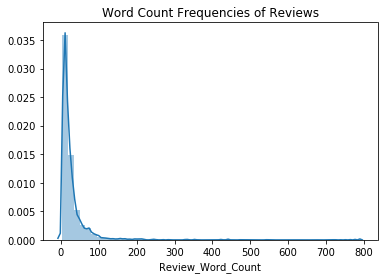

In [81]:
#Plot the values of the word count to check its distribution.

sns.distplot(lionking_dataset.Review_Word_Count)
plt.title("Word Count Frequencies of Reviews")

In [82]:
#Description of the Word Counts

lionking_dataset.Review_Word_Count.describe()

count    3000.000000
mean       26.858000
std        43.094813
min         2.000000
25%         8.000000
50%        15.000000
75%        29.000000
max       786.000000
Name: Review_Word_Count, dtype: float64

In [83]:
#Check how the word count is affects the sentiment for word count till 20

wordcount= pd.crosstab(lionking_dataset.sentiment, lionking_dataset.Review_Word_Count)

wordcount.loc[:, :20]


Review_Word_Count,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
sentiment,,,,,,,,,,,,,,,,,,,
0,0,9,19,21,21,28,24,27,31,20,20,18,20,22,19,14,24,23,15
1,11,47,120,132,149,121,90,107,89,96,77,86,62,70,59,61,40,35,45


### WordCloud

In [84]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#Define a function review_wordcloud 

def review_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        max_words=200,
        max_font_size=60, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud, )
    plt.show()
 

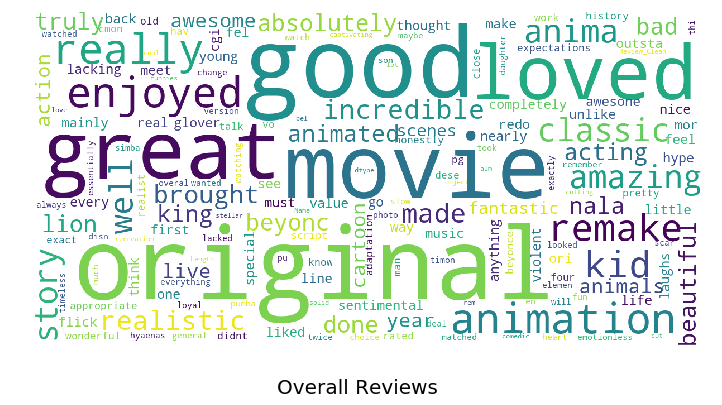

In [85]:
#Print all the reviews in a wordcloud

review_wordcloud(lionking_dataset["Review_Clean"], title= 'Overall Reviews')

As we know that the wordcloud defines the frequencies of its occurence. We can see that the below words are most occured in overall review sentiment.

- Good
- Original
- Movie
- Loved
- Great . etc


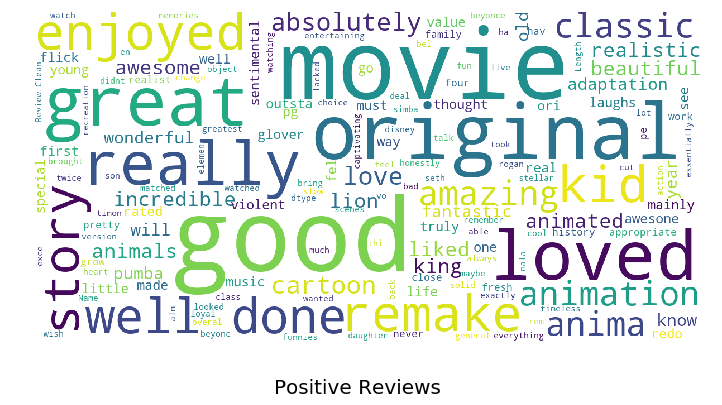

In [86]:
# Let's print only the Postive Reviews in WordCloud

review_wordcloud(lionking_dataset[lionking_dataset.sentiment == 1]["Review_Clean"], title = "Positive Reviews")

For the above wordcloud we can see the word frequencies which are used in postive sentiment reviews.

Few of the words as per size(frequency) used in positive reviews are :
- Good
- Great
- Enjoyed
- Loved. etc

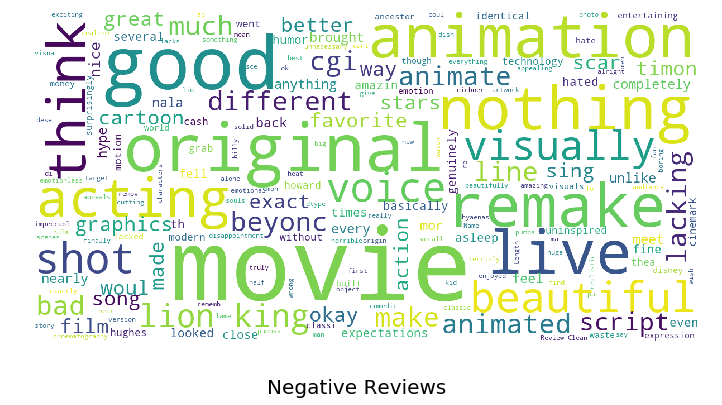

In [87]:
#Print the Negative Reviews in WordCloud

review_wordcloud(lionking_dataset[lionking_dataset.sentiment == 0]["Review_Clean"], title = "Negative Reviews")

For the above wordcloud we can see the word frequencies which are used in negative sentiment reviews

We can see that there are few generic words, which is used in both positive and negative sentiments.

Those Generic words are:
- Movie
- Original
- Remake

Few of the words used in negative sentiment more often are:
- Animation 
- Nothing
- Acting
- Live etc



### N-Grams and its Frequencies

In [88]:
# N-Grams tells us about the word pairs that occured in a sentence.
# Analysing n-grams will let us know how frequent the words occured together.
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

 
#Subset the negative reviews from "Review_Clean"
negative_review = lionking_dataset[lionking_dataset.sentiment == 0]["Review_Clean"].tolist()
#Subset the positive reviews from "Review_Clean"
positive_review = lionking_dataset[lionking_dataset.sentiment == 1]["Review_Clean"].tolist()

#Convert the list to string
negative_review = ''.join(negative_review)
positive_review = ''.join(positive_review)

#Generate the n-grams

#negative n-grams
negative_2gram= extract_ngrams(negative_review,2)
negative_3gram= extract_ngrams(negative_review,3)

#Postive n-grams
positive_2gram= extract_ngrams(positive_review,2)
positive_3gram= extract_ngrams(positive_review,3)


In [89]:
#Count the frequency of the n-grams

#Positive N-grams

bigram_counts = Counter(positive_2gram)
print("The Most Common Positive Bi-Gram is : \n",bigram_counts.most_common(12))
print("----------------------------------")
trigram_counts = Counter(positive_3gram)
print("The Most Common Positive Tri-Gram is : \n",trigram_counts.most_common(12))

The Most Common Positive Bi-Gram is : 
 [('the original', 487), ('of the', 305), ('it was', 294), ('to the', 233), ('the movie', 214), ('and the', 151), ('lion king', 147), ('this movie', 124), ('it is', 123), ('was a', 119), ('and i', 113), ('loved it', 108)]
----------------------------------
The Most Common Positive Tri-Gram is : 
 [('to the original', 118), ('the lion king', 76), ('true to the', 62), ('of the original', 58), ('the original but', 50), ('from the original', 45), ('it was a', 39), ('the animated version', 37), ('thought it was', 36), ('as the original', 36), ('the original and', 35), ('some of the', 33)]


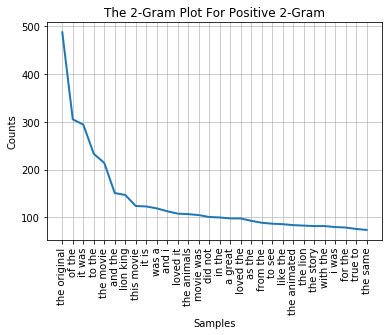

In [90]:
#Plot the 2-Grams for postive review

positive_2gram=FreqDist(positive_2gram)

plt.title("The 2-Gram Plot For Positive 2-Gram")
positive_2gram.plot(30)

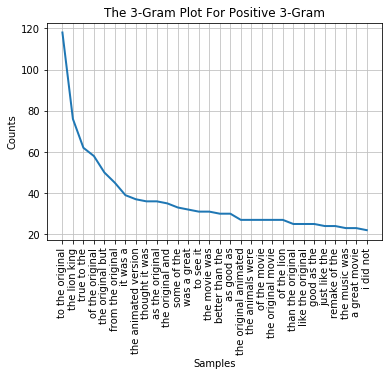

In [91]:
#Plot the 3-Grams for positive review

positive_3gram=FreqDist(positive_3gram)

plt.title("The 3-Gram Plot For Positive 3-Gram")
positive_3gram.plot(30)

In [92]:
#Negative N-grams

bigram_counts = Counter(negative_2gram)
print("The Most Common Negative Bi-Gram is : \n",bigram_counts.most_common(12))
print("----------------------------------")
trigram_counts = Counter(negative_3gram)
print("The Most Common Negative Tri-Gram is : \n",trigram_counts.most_common(12))

The Most Common Negative Bi-Gram is : 
 [('the original', 358), ('of the', 308), ('it was', 179), ('did not', 157), ('in the', 134), ('to the', 133), ('the movie', 118), ('it is', 116), ('this movie', 107), ('lion king', 92), ('and the', 82), ('to be', 75)]
----------------------------------
The Most Common Negative Tri-Gram is : 
 [('of the original', 77), ('the lion king', 45), ('some of the', 43), ('to the original', 35), ('i did not', 29), ('from the original', 28), ('in the original', 27), ('as the original', 26), ('the voice acting', 25), ('a lot of', 24), ('the original was', 24), ('shot for shot', 23)]


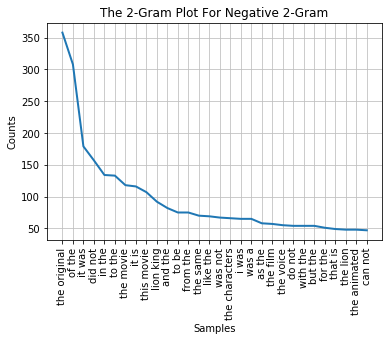

In [93]:
#Plot the 2-Grams for Negative review

negative_2gram=FreqDist(negative_2gram)

plt.title("The 2-Gram Plot For Negative 2-Gram")
negative_2gram.plot(30)

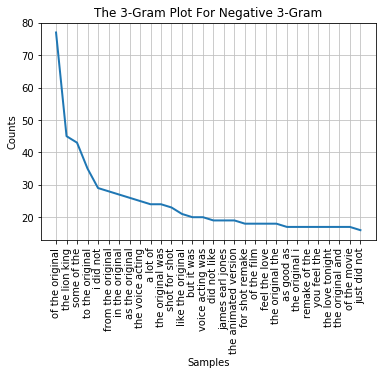

In [94]:
#Plot the 3-Grams for Negative review

negative_3gram=FreqDist(negative_3gram)

plt.title("The 3-Gram Plot For Negative 3-Gram")
negative_3gram.plot(30)

As we are done with the analysis of the review and its occurence. Let's delete the attributes which is not required and re-arrange the columns.

In [95]:
#Read few records from the dataset.

lionking_dataset.head(3)

,ReviewID,Reviewer Name,Verified Reviewer,Review,Platform,sentiment,Review_Day,Review_Clean,Review_Word_Count
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,Joanne H,True,I liked most that the animation made the anima...,Fandango,1,18,i liked most that the animation made the anima...,12
1,871398953,Frankie C,False,Amazing! So realistic and incredible music,RT,1,18,amazing so realistic and incredible music,6
2,DD2453B0-37CE-4B47-A099-D15378FC310E,jaycee,False,Classic. Good remake. Loved it. Glover was out...,Fandango,1,18,classic good remake loved it glover was outsta...,8


In [96]:
# Drop the columns which are not required further

lionking_dataset.drop(["Reviewer Name","Review", "Review_Day","Review_Word_Count"], axis = 1, inplace = True) 

In [97]:
#Take a look at dataset

lionking_dataset.head(3)

,ReviewID,Verified Reviewer,Platform,sentiment,Review_Clean
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,True,Fandango,1,i liked most that the animation made the anima...
1,871398953,False,RT,1,amazing so realistic and incredible music
2,DD2453B0-37CE-4B47-A099-D15378FC310E,False,Fandango,1,classic good remake loved it glover was outsta...


In [98]:
#Rearrange the attributes

lionking_dataset = lionking_dataset[["ReviewID","Verified Reviewer", "Platform","Review_Clean","sentiment"]]

In [99]:
lionking_dataset.head()

,ReviewID,Verified Reviewer,Platform,Review_Clean,sentiment
0,2c73ed20-5b9f-41b3-a4fd-8dd3ff8bb20a,True,Fandango,i liked most that the animation made the anima...,1
1,871398953,False,RT,amazing so realistic and incredible music,1
2,DD2453B0-37CE-4B47-A099-D15378FC310E,False,Fandango,classic good remake loved it glover was outsta...,1
3,906750266,False,RT,nice animation cgi but completely lacking the ...,0
4,21FE7D93-351C-43B5-833D-B1DB11F3FD6A,True,Fandango,good but go mainly for the sentimental value,1


In [102]:
#Save the file as csv

lionking_dataset.to_csv('Lionking_Dataset_Cleaned.csv',index_label=False)

This concludes the Data Preprocessing and Exploratory Data Analysis (EDA).